<a href="https://colab.research.google.com/github/RAGILSAPUTRI/AI_TUGAS/blob/main/DigitRecognizer_CNN__RAGIL_SAPUTRI_DATA_SCIENCE_DEEP_LEARNING_FULL_AUGMENTASI_(ANGKA_PUTIH).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau


In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_train.isnull().sum()

,0
label,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [6]:
y_train  = df_train['label'].values # np array of all the labels (42000, )
X_train = df_train.drop(columns=['label']).values.reshape(-1,28,28,1)/255.0 # drop the labels and reshape (num_rows, height , width , channel)
X_test = df_test.values.reshape(-1, 28, 28, 1) / 255.0 # /255.0 --> ormalizing these pixel values to the range [0, 1]

In [7]:
y_train_encoded = to_categorical(y_train, num_classes=10)

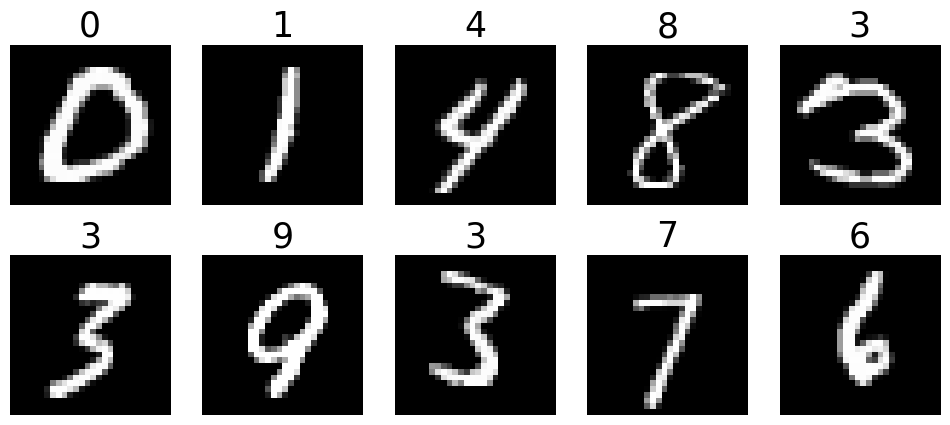

In [8]:
fig , axes  = plt.subplots(2, 5, figsize=(12,5))
axes   = axes.flatten()
idx = np.random.randint(0, 42000, size=10)
for i in range(10):
    axes[i].imshow(X_train[idx[i], :].reshape(28,28), cmap='gray')
    axes[i].axis('off') # hide the axes ticks
    axes[i].set_title(str(int(y_train[idx[i]])), color='black', fontsize=25)
plt.show()

In [9]:
model = models.Sequential([

    layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)),
    layers.Conv2D(filters=64, kernel_size=3, padding='same',activation='relu'),
    layers.Conv2D(filters=128, kernel_size=3, padding='same',activation='relu'),
    layers.MaxPool2D(pool_size=2),

    layers.Conv2D(filters=128, kernel_size=3, padding='same',activation='relu'),
    layers.Conv2D(filters=192, kernel_size=3, padding='same',activation='relu'),
    layers.MaxPool2D(pool_size=2),

    layers.Conv2D(filters=192, kernel_size=5, padding='same',activation='relu'),
    layers.MaxPool2D(pool_size=2, padding='same'),

    layers.Flatten(),

    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=10, activation='softmax'),
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 192)    │       221,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 192)      │       921,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,574,304 (25.08 MB)

 Trainable params: 2,191,434 (8.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,382,870 (16.72 MB)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Fungsi preprocessing inversi
def invert_image(x):
    return 1.0 - x

# Data generator dengan augmentasi inversi dan transformasi ringan lain
datagen = ImageDataGenerator(
    preprocessing_function=invert_image,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.1  # tetap pisahkan data validasi
)


In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.3, verbose=1,
                              patience=2, min_lr=0.00000001)


history = model.fit(
    datagen.flow(X_train, y_train_encoded, batch_size=64, subset='training'),
    validation_data=datagen.flow(X_train, y_train_encoded, batch_size=64, subset='validation'),
    epochs=10,
    callbacks=[reduce_lr]
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6786 - loss: 0.8852

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


591/591 ━━━━━━━━━━━━━━━━━━━━ 1151s 2s/step - accuracy: 0.6789 - loss: 0.8843 - val_accuracy: 0.9802 - val_loss: 0.0657 - learning_rate: 0.0010
Epoch 2/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 1157s 2s/step - accuracy: 0.9773 - loss: 0.0717 - val_accuracy: 0.9869 - val_loss: 0.0504 - learning_rate: 0.0010
Epoch 3/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 1147s 2s/step - accuracy: 0.9850 - loss: 0.0517 - val_accuracy: 0.9867 - val_loss: 0.0387 - learning_rate: 0.0010
Epoch 4/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 1138s 2s/step - accuracy: 0.9871 - loss: 0.0419 - val_accuracy: 0.9848 - val_loss: 0.0507 - learning_rate: 0.0010
Epoch 5/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 1135s 2s/step - accuracy: 0.9877 - loss: 0.0385 - val_accuracy: 0.9898 - val_loss: 0.0351 - learning_rate: 0.0010
Epoch 6/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 1110s 2s/step - accuracy: 0.9903 - loss: 0.0343 - val_accuracy: 0.9874 - val_loss: 0.0372 - learning_rate: 0.0010
Epoch 7/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 1106s 2s/step - accuracy: 0.9906 - loss: 0.0292

<Axes: >

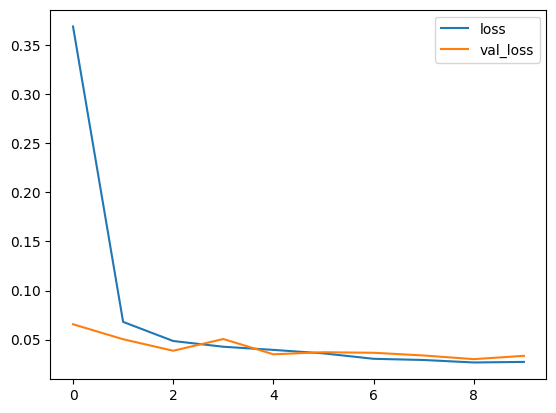

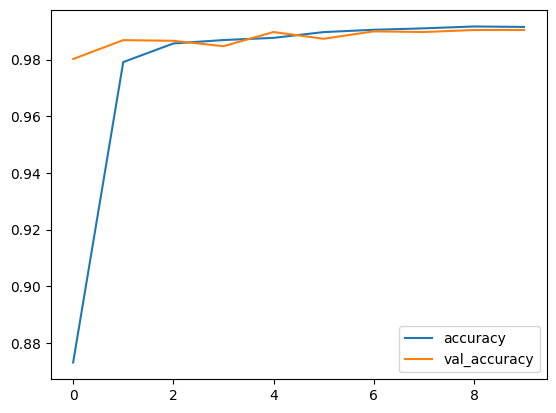

In [14]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[: , ['loss', 'val_loss']].plot()
history_frame.loc[: , ['accuracy', 'val_accuracy']].plot()

In [13]:
# Evaluasi performa model
val_loss, val_accuracy = model.evaluate(datagen.flow(X_train, y_train_encoded, subset='validation'))
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


132/132 ━━━━━━━━━━━━━━━━━━━━ 34s 258ms/step - accuracy: 0.9917 - loss: 0.0355
Validation Loss: 0.0266
Validation Accuracy: 0.9926


In [18]:
model.save('digit_recognizer_cnn.h5')


In [17]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)


875/875 ━━━━━━━━━━━━━━━━━━━━ 216s 247ms/step


In [19]:
submission = pd.DataFrame({'ImageId': list(range(1, len(predicted_labels)+1)),
                           'Label': predicted_labels})
submission.to_csv('submission.csv', index=False)


In [27]:
# 1. Fungsi invers acak
def random_invert(x):
    if np.random.rand() > 0.5:
        return 1.0 - x
    return x

# 2. ImageDataGenerator dengan augmentasi
datagen = ImageDataGenerator(
    preprocessing_function=random_invert,  # fungsi sudah didefinisikan di atas
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.1
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


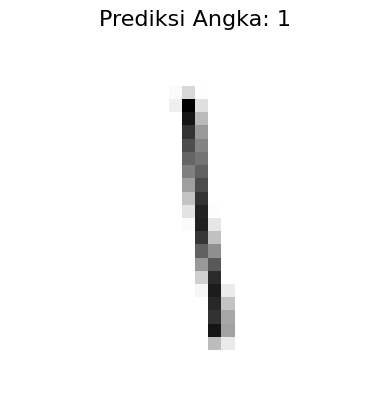

Model memprediksi angka: 1


In [28]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load model yang sudah disimpan
model = load_model('digit_recognizer_cnn.h5')

# Path gambar
image_path = 'Angka_1_wh.jpg'  # Ganti dengan nama file gambarmu

# Baca gambar, ubah ke grayscale
img = Image.open(image_path).convert('L')  # 'L' untuk grayscale
img = img.resize((28, 28))  # Resize ke 28x28 piksel

# Konversi ke array dan invert jika background putih
img_array = np.array(img)
img_array = 255 - img_array  # Invers jika angka hitam di latar putih

# Normalisasi dan reshape
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi angka
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

# Tampilkan hasil
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi Angka: {predicted_label}', fontsize=16)
plt.axis('off')
plt.show()

print(f"Model memprediksi angka: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


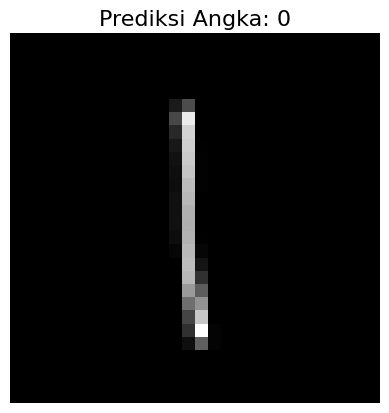

Model memprediksi angka: 0


In [29]:
# Path gambar
image_path = 'Angka_1_bl.jpg'  # Ganti dengan nama file gambarmu

# Baca gambar, ubah ke grayscale
img = Image.open(image_path).convert('L')  # 'L' untuk grayscale
img = img.resize((28, 28))  # Resize ke 28x28 piksel

# Konversi ke array dan invert jika background putih
img_array = np.array(img)
img_array = 255 - img_array  # Invers jika angka hitam di latar putih

# Normalisasi dan reshape
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi angka
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

# Tampilkan hasil
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi Angka: {predicted_label}', fontsize=16)
plt.axis('off')
plt.show()

print(f"Model memprediksi angka: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


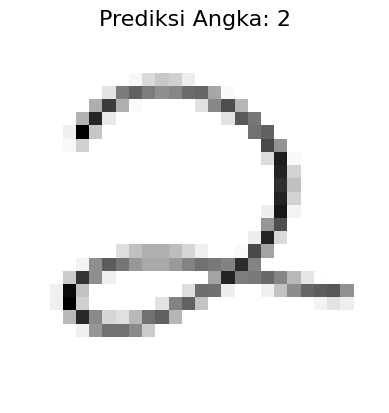

Model memprediksi angka: 2


In [23]:
# Path gambar
image_path = 'Angka_2_wh.jpg'  # Ganti dengan nama file gambarmu

# Baca gambar, ubah ke grayscale
img = Image.open(image_path).convert('L')  # 'L' untuk grayscale
img = img.resize((28, 28))  # Resize ke 28x28 piksel

# Konversi ke array dan invert jika background putih
img_array = np.array(img)
img_array = 255 - img_array  # Invers jika angka hitam di latar putih

# Normalisasi dan reshape
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi angka
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

# Tampilkan hasil
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi Angka: {predicted_label}', fontsize=16)
plt.axis('off')
plt.show()

print(f"Model memprediksi angka: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


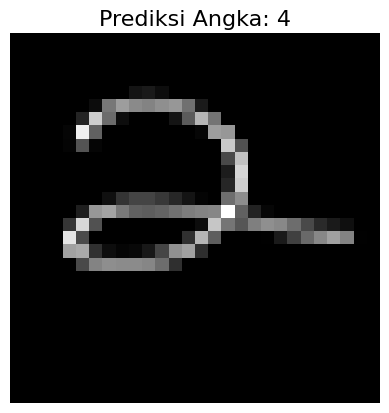

Model memprediksi angka: 4


In [24]:
# Path gambar
image_path = 'Angka_2_bl.jpg'  # Ganti dengan nama file gambarmu

# Baca gambar, ubah ke grayscale
img = Image.open(image_path).convert('L')  # 'L' untuk grayscale
img = img.resize((28, 28))  # Resize ke 28x28 piksel

# Konversi ke array dan invert jika background putih
img_array = np.array(img)
img_array = 255 - img_array  # Invers jika angka hitam di latar putih

# Normalisasi dan reshape
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi angka
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

# Tampilkan hasil
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi Angka: {predicted_label}', fontsize=16)
plt.axis('off')
plt.show()

print(f"Model memprediksi angka: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


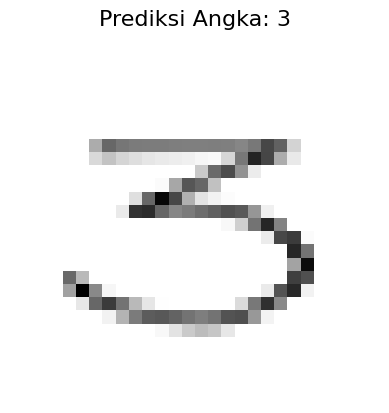

Model memprediksi angka: 3


In [30]:
# Path gambar
image_path = 'Angka_3_wh.jpg'  # Ganti dengan nama file gambarmu

# Baca gambar, ubah ke grayscale
img = Image.open(image_path).convert('L')  # 'L' untuk grayscale
img = img.resize((28, 28))  # Resize ke 28x28 piksel

# Konversi ke array dan invert jika background putih
img_array = np.array(img)
img_array = 255 - img_array  # Invers jika angka hitam di latar putih

# Normalisasi dan reshape
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi angka
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

# Tampilkan hasil
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi Angka: {predicted_label}', fontsize=16)
plt.axis('off')
plt.show()

print(f"Model memprediksi angka: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


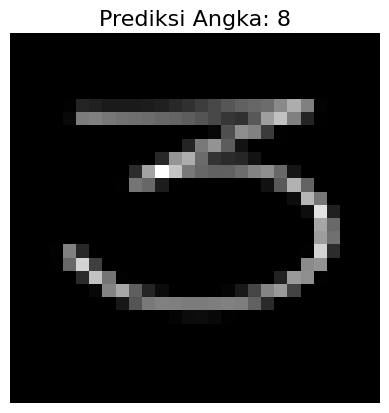

Model memprediksi angka: 8


In [31]:
# Path gambar
image_path = 'Angka_3_bl.jpg'  # Ganti dengan nama file gambarmu

# Baca gambar, ubah ke grayscale
img = Image.open(image_path).convert('L')  # 'L' untuk grayscale
img = img.resize((28, 28))  # Resize ke 28x28 piksel

# Konversi ke array dan invert jika background putih
img_array = np.array(img)
img_array = 255 - img_array  # Invers jika angka hitam di latar putih

# Normalisasi dan reshape
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi angka
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

# Tampilkan hasil
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi Angka: {predicted_label}', fontsize=16)
plt.axis('off')
plt.show()

print(f"Model memprediksi angka: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


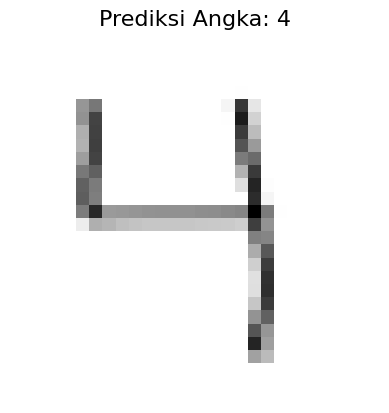

Model memprediksi angka: 4


In [32]:
# Path gambar
image_path = 'Angka_4_wh.jpg'  # Ganti dengan nama file gambarmu

# Baca gambar, ubah ke grayscale
img = Image.open(image_path).convert('L')  # 'L' untuk grayscale
img = img.resize((28, 28))  # Resize ke 28x28 piksel

# Konversi ke array dan invert jika background putih
img_array = np.array(img)
img_array = 255 - img_array  # Invers jika angka hitam di latar putih

# Normalisasi dan reshape
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi angka
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

# Tampilkan hasil
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi Angka: {predicted_label}', fontsize=16)
plt.axis('off')
plt.show()

print(f"Model memprediksi angka: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


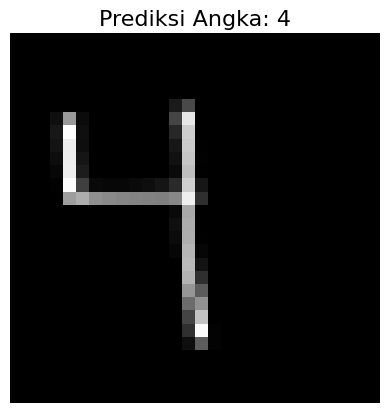

Model memprediksi angka: 4


In [33]:
# Path gambar
image_path = 'Angka_4_bl.jpg'  # Ganti dengan nama file gambarmu

# Baca gambar, ubah ke grayscale
img = Image.open(image_path).convert('L')  # 'L' untuk grayscale
img = img.resize((28, 28))  # Resize ke 28x28 piksel

# Konversi ke array dan invert jika background putih
img_array = np.array(img)
img_array = 255 - img_array  # Invers jika angka hitam di latar putih

# Normalisasi dan reshape
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi angka
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

# Tampilkan hasil
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi Angka: {predicted_label}', fontsize=16)
plt.axis('off')
plt.show()

print(f"Model memprediksi angka: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


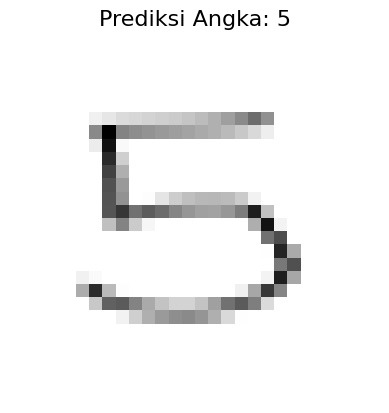

Model memprediksi angka: 5


In [34]:
# Path gambar
image_path = 'Angka_5_wh.jpg'  # Ganti dengan nama file gambarmu

# Baca gambar, ubah ke grayscale
img = Image.open(image_path).convert('L')  # 'L' untuk grayscale
img = img.resize((28, 28))  # Resize ke 28x28 piksel

# Konversi ke array dan invert jika background putih
img_array = np.array(img)
img_array = 255 - img_array  # Invers jika angka hitam di latar putih

# Normalisasi dan reshape
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi angka
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

# Tampilkan hasil
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi Angka: {predicted_label}', fontsize=16)
plt.axis('off')
plt.show()

print(f"Model memprediksi angka: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


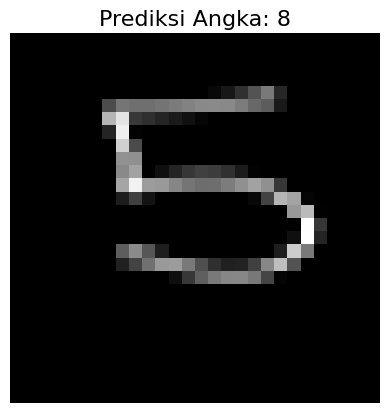

Model memprediksi angka: 8


In [35]:
# Path gambar
image_path = 'Angka_5_bl.jpg'  # Ganti dengan nama file gambarmu

# Baca gambar, ubah ke grayscale
img = Image.open(image_path).convert('L')  # 'L' untuk grayscale
img = img.resize((28, 28))  # Resize ke 28x28 piksel

# Konversi ke array dan invert jika background putih
img_array = np.array(img)
img_array = 255 - img_array  # Invers jika angka hitam di latar putih

# Normalisasi dan reshape
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi angka
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

# Tampilkan hasil
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi Angka: {predicted_label}', fontsize=16)
plt.axis('off')
plt.show()

print(f"Model memprediksi angka: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


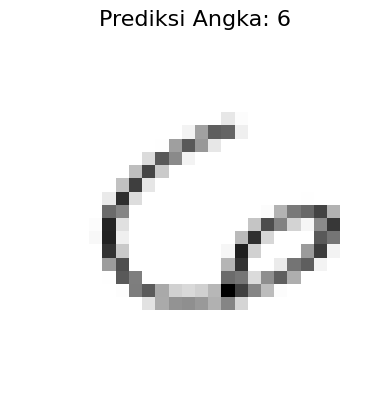

Model memprediksi angka: 6


In [36]:
# Path gambar
image_path = 'Angka_6_wh.jpg'  # Ganti dengan nama file gambarmu

# Baca gambar, ubah ke grayscale
img = Image.open(image_path).convert('L')  # 'L' untuk grayscale
img = img.resize((28, 28))  # Resize ke 28x28 piksel

# Konversi ke array dan invert jika background putih
img_array = np.array(img)
img_array = 255 - img_array  # Invers jika angka hitam di latar putih

# Normalisasi dan reshape
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi angka
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

# Tampilkan hasil
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi Angka: {predicted_label}', fontsize=16)
plt.axis('off')
plt.show()

print(f"Model memprediksi angka: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


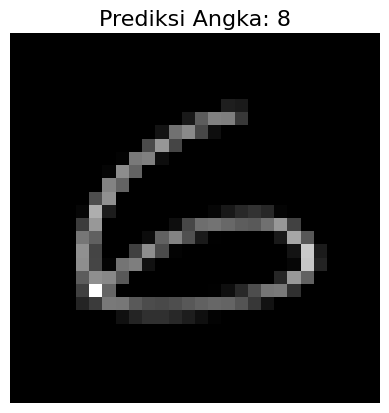

Model memprediksi angka: 8


In [37]:
# Path gambar
image_path = 'Angka_6_bl.jpg'  # Ganti dengan nama file gambarmu

# Baca gambar, ubah ke grayscale
img = Image.open(image_path).convert('L')  # 'L' untuk grayscale
img = img.resize((28, 28))  # Resize ke 28x28 piksel

# Konversi ke array dan invert jika background putih
img_array = np.array(img)
img_array = 255 - img_array  # Invers jika angka hitam di latar putih

# Normalisasi dan reshape
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi angka
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

# Tampilkan hasil
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi Angka: {predicted_label}', fontsize=16)
plt.axis('off')
plt.show()

print(f"Model memprediksi angka: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


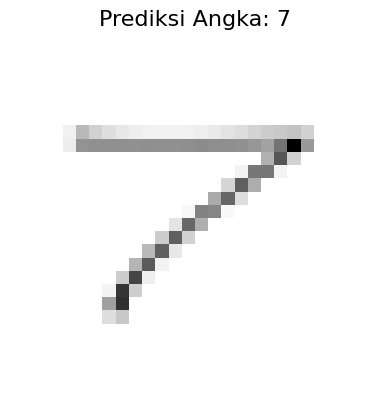

Model memprediksi angka: 7


In [38]:
# Path gambar
image_path = 'Angka_7_wh.jpg'  # Ganti dengan nama file gambarmu

# Baca gambar, ubah ke grayscale
img = Image.open(image_path).convert('L')  # 'L' untuk grayscale
img = img.resize((28, 28))  # Resize ke 28x28 piksel

# Konversi ke array dan invert jika background putih
img_array = np.array(img)
img_array = 255 - img_array  # Invers jika angka hitam di latar putih

# Normalisasi dan reshape
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi angka
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

# Tampilkan hasil
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi Angka: {predicted_label}', fontsize=16)
plt.axis('off')
plt.show()

print(f"Model memprediksi angka: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


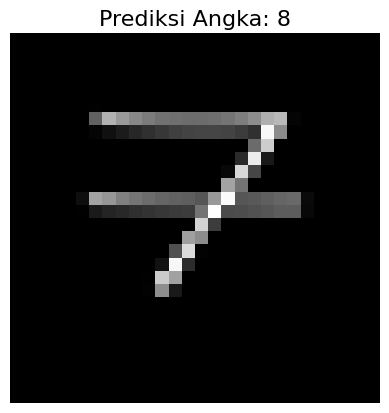

Model memprediksi angka: 8


In [39]:
# Path gambar
image_path = 'Angka_7_bl.jpg'  # Ganti dengan nama file gambarmu

# Baca gambar, ubah ke grayscale
img = Image.open(image_path).convert('L')  # 'L' untuk grayscale
img = img.resize((28, 28))  # Resize ke 28x28 piksel

# Konversi ke array dan invert jika background putih
img_array = np.array(img)
img_array = 255 - img_array  # Invers jika angka hitam di latar putih

# Normalisasi dan reshape
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi angka
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

# Tampilkan hasil
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi Angka: {predicted_label}', fontsize=16)
plt.axis('off')
plt.show()

print(f"Model memprediksi angka: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


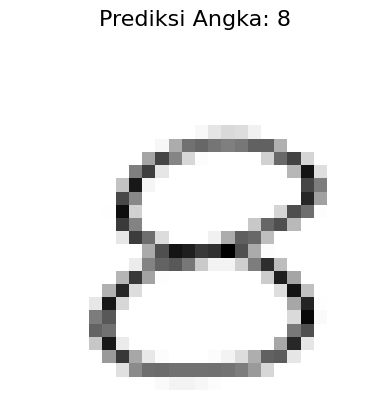

Model memprediksi angka: 8


In [40]:
# Path gambar
image_path = 'Angka_8_wh.jpg'  # Ganti dengan nama file gambarmu

# Baca gambar, ubah ke grayscale
img = Image.open(image_path).convert('L')  # 'L' untuk grayscale
img = img.resize((28, 28))  # Resize ke 28x28 piksel

# Konversi ke array dan invert jika background putih
img_array = np.array(img)
img_array = 255 - img_array  # Invers jika angka hitam di latar putih

# Normalisasi dan reshape
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi angka
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

# Tampilkan hasil
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi Angka: {predicted_label}', fontsize=16)
plt.axis('off')
plt.show()

print(f"Model memprediksi angka: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


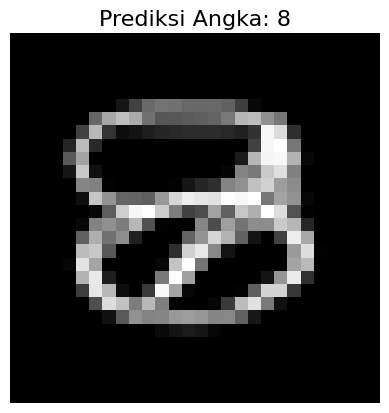

Model memprediksi angka: 8


In [41]:
# Path gambar
image_path = 'Angka_8_bl.jpg'  # Ganti dengan nama file gambarmu

# Baca gambar, ubah ke grayscale
img = Image.open(image_path).convert('L')  # 'L' untuk grayscale
img = img.resize((28, 28))  # Resize ke 28x28 piksel

# Konversi ke array dan invert jika background putih
img_array = np.array(img)
img_array = 255 - img_array  # Invers jika angka hitam di latar putih

# Normalisasi dan reshape
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi angka
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

# Tampilkan hasil
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi Angka: {predicted_label}', fontsize=16)
plt.axis('off')
plt.show()

print(f"Model memprediksi angka: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


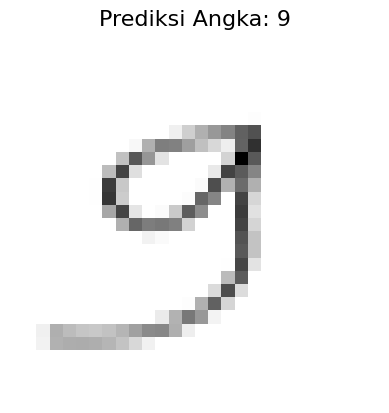

Model memprediksi angka: 9


In [42]:
# Path gambar
image_path = 'Angka_9_wh.jpg'  # Ganti dengan nama file gambarmu

# Baca gambar, ubah ke grayscale
img = Image.open(image_path).convert('L')  # 'L' untuk grayscale
img = img.resize((28, 28))  # Resize ke 28x28 piksel

# Konversi ke array dan invert jika background putih
img_array = np.array(img)
img_array = 255 - img_array  # Invers jika angka hitam di latar putih

# Normalisasi dan reshape
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi angka
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

# Tampilkan hasil
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi Angka: {predicted_label}', fontsize=16)
plt.axis('off')
plt.show()

print(f"Model memprediksi angka: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


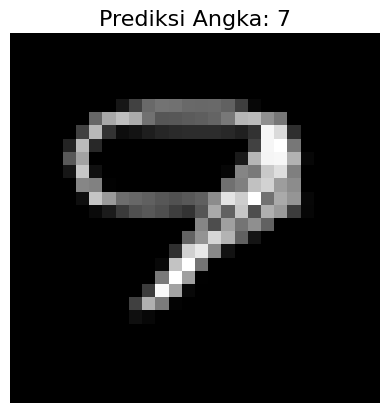

Model memprediksi angka: 7


In [44]:
# Path gambar
image_path = 'Angka_9_bl.jpg'  # Ganti dengan nama file gambarmu

# Baca gambar, ubah ke grayscale
img = Image.open(image_path).convert('L')  # 'L' untuk grayscale
img = img.resize((28, 28))  # Resize ke 28x28 piksel

# Konversi ke array dan invert jika background putih
img_array = np.array(img)
img_array = 255 - img_array  # Invers jika angka hitam di latar putih

# Normalisasi dan reshape
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi angka
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

# Tampilkan hasil
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi Angka: {predicted_label}', fontsize=16)
plt.axis('off')
plt.show()

print(f"Model memprediksi angka: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


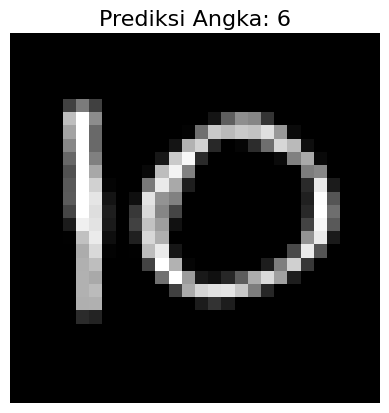

Model memprediksi angka: 6


In [47]:
# Path gambar
image_path = 'Angka_10_bl.jpg'  # Ganti dengan nama file gambarmu

# Baca gambar, ubah ke grayscale
img = Image.open(image_path).convert('L')  # 'L' untuk grayscale
img = img.resize((28, 28))  # Resize ke 28x28 piksel

# Konversi ke array dan invert jika background putih
img_array = np.array(img)
img_array = 255 - img_array  # Invers jika angka hitam di latar putih

# Normalisasi dan reshape
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Prediksi angka
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

# Tampilkan hasil
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'Prediksi Angka: {predicted_label}', fontsize=16)
plt.axis('off')
plt.show()

print(f"Model memprediksi angka: {predicted_label}")
